In [12]:
import pandas as pd
from src.controllers.plotter_processor import Plotter
from src.controllers.ndvi_processor import NDVIProcessor
from src.controllers.data_processor import DataProcessor
from src.controllers.ndvi_parameters import NDVIParameters
from src.controllers.metrics_processor import PhenologicalMetrics

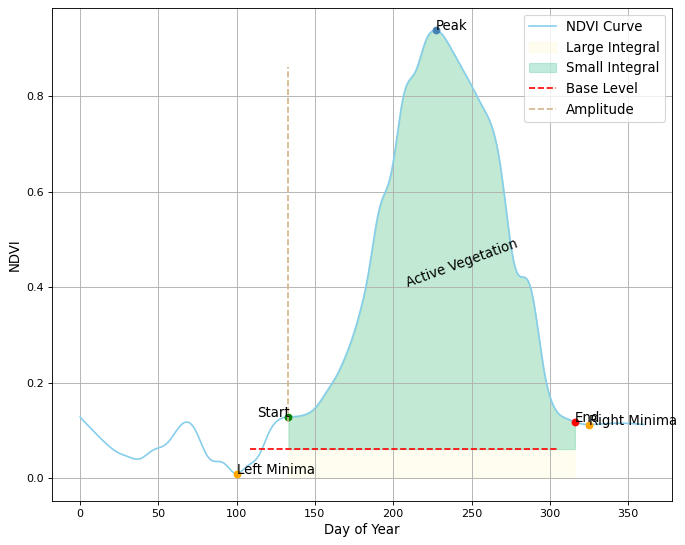

In [13]:
df_data = pd.read_excel(r"data\landuse_T15SYT.xlsx")

column_name = "Sample_0"

# Data processing
data_processor = DataProcessor(df_data)
processed_data = data_processor.process_data()

# NDVI processing
ndvi_processor = NDVIProcessor(processed_data, sample=column_name)
processed_ndvi = ndvi_processor.process_ndvi()

#NDVI Parameters
ndvi_params = NDVIParameters(processed_ndvi)
rolling_mean_forw, rolling_mean_back, t_min, t_left_min, t_right_min = ndvi_params.calculate_parameters()

# Assuming you have ndvi, rolling_mean_forw, rolling_mean_back, t_min, t_left_min, and t_right_min already defined
pheno_metrics_obj = PhenologicalMetrics(processed_ndvi, rolling_mean_forw, rolling_mean_back, t_min, t_left_min, t_right_min)

# cycl_fr = pheno_metrics_obj.get_cycl_fr()
# perm_fr = pheno_metrics_obj.get_perm_fr()
# rate_inc = pheno_metrics_obj.get_rate_inc()
# rate_dec = pheno_metrics_obj.get_rate_dec()
pheno_metrics = pheno_metrics_obj.get_pheno_metrics()


# Assuming you have ndvi, pheno_metrics, t_left_min, t_right_min, and t_min already defined
plotter = Plotter(processed_ndvi, pheno_metrics, t_left_min, t_right_min, t_min)
plotter.plot_metrics()